In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
def comma_to_float (valstr):
    return float(valstr.decode("utf-8").replace(',','.'))

lamb_og, inten_og=np.loadtxt('C:/Users/Praktikum-Pc1/Documents/AA/Himmel.txt',skiprows=17, 
                              converters= {0:comma_to_float, 1:comma_to_float}, 
                              comments='>', unpack=True)

lamb_mg, inten_mg=np.loadtxt('C:/Users/Praktikum-Pc1/Documents/AA/Fenster.txt',skiprows=17, 
        converters= {0:comma_to_float, 1:comma_to_float},
        comments='>', unpack=True)





<IPython.core.display.Javascript object>


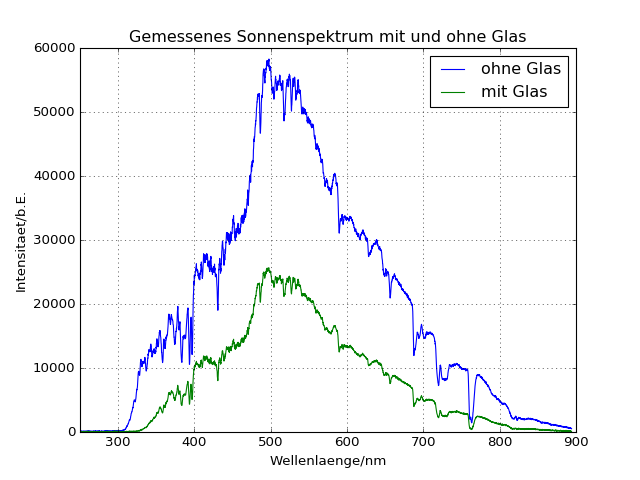

In [3]:
plt.plot(lamb_og, inten_og, label='ohne Glas')
plt.plot(lamb_mg, inten_mg, label='mit Glas')
plt.title('Gemessenes Sonnenspektrum mit und ohne Glas')
plt.xlabel('Wellenlaenge/nm')
plt.ylabel('Intensitaet/b.E.')
plt.legend()
plt.grid()
plt.ylim((0,60000))
plt.xlim((250,900))
plt.savefig("C:/Users/Praktikum-Pc1/Documents/AA/Himmel1", format="pdf")

In [12]:
for m in range (4,6):
    l=1.2398E3/(-13.605/(m-0.8)**2+5.12)
    print('m={m:2d}, lambda={l:6.2f}'.format(m=m,l=l))

m= 4, lambda=327.00
m= 5, lambda=285.09


<IPython.core.display.Javascript object>


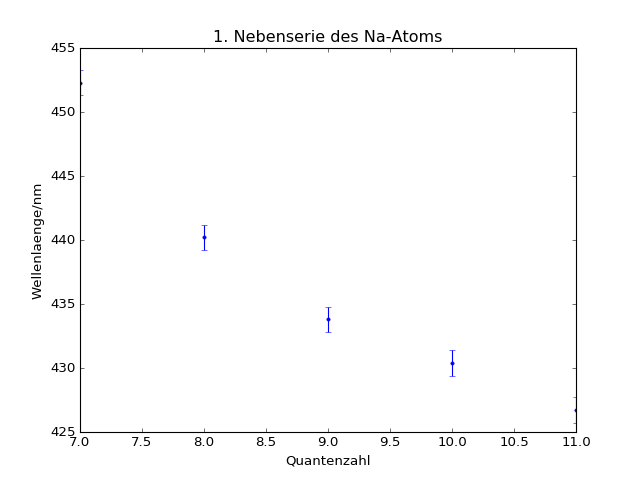

E_Ry= -4.7527419808 ,Standardfehler= 1.6022830481
E_3p= -2.96719684262 ,Standardfehler= 0.0145234177812
D_d= 2.41124587388 ,Standardfehler= 0.642634735335


In [22]:
wellenl=np.array([452.3,440.2,433.8,430.4,426.7])
fehler=np.array([1,1,1,1,1])
quantenz=np.arange(7,12)

plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge/nm')
plt.title('1. Nebenserie des Na-Atoms')

from scipy.optimize import curve_fit
def fit_func(m,E_Ry,E_3p,D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl, sigma=fehler ,p0=para)

print("E_Ry=",popt[0], ",Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1], ",Standardfehler=", np.sqrt(pcov[1][1]))
print("D_d=",popt[2], ",Standardfehler=", np.sqrt(pcov[2][2]))


In [14]:
chi2_=np.sum((fit_func(quantenz,*popt)-wellenl)**2/fehler**2)
dof=len(quantenz)-3 #dof:degreesof freedom, Freheitsgrad
chi2_red=chi2_/dof
print("chi2=", chi2_)
print("chi2_red=",chi2_red)

chi2= 0.595434432108
chi2_red= 0.297717216054


In [15]:
from scipy.stats import chi2
prob=round(1-chi2.cdf(chi2_,dof),2)*100
print("Wahrscheinlichkeit:", prob,"%")

Wahrscheinlichkeit: 74.0 %


<IPython.core.display.Javascript object>


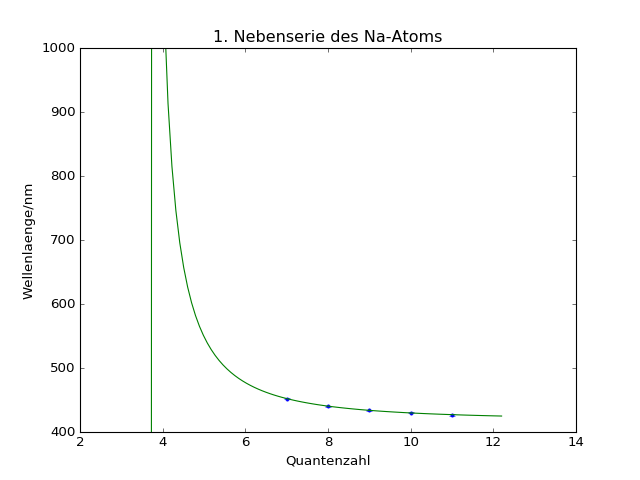

In [16]:
plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge/nm')
plt.ylim((400,1000))
plt.title('1. Nebenserie des Na-Atoms')
x=np.linspace(2.8,12.2, 100)
plt.plot(x, fit_func(x,*popt))
plt.savefig("data/1_Nebenserie.pdf", format="pdf")

<IPython.core.display.Javascript object>


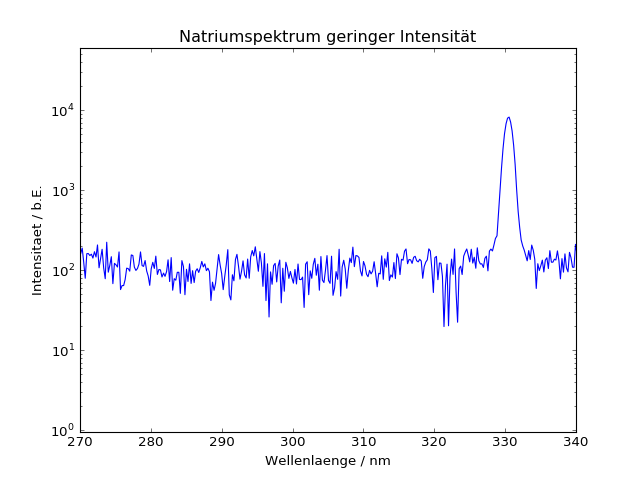

In [17]:
lamb, inten=np.loadtxt('data/Nasa.txt',skiprows=17, 
        converters= {0:comma_to_float, 1:comma_to_float},
        comments='>', unpack=True)


plt.plot(lamb, inten)
plt.title('Natriumspektrum geringer Intensität')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.xlim((270,340))
plt.ylim((0,60000))
plt.savefig("data/nasa.pdf", format="pdf")

<IPython.core.display.Javascript object>


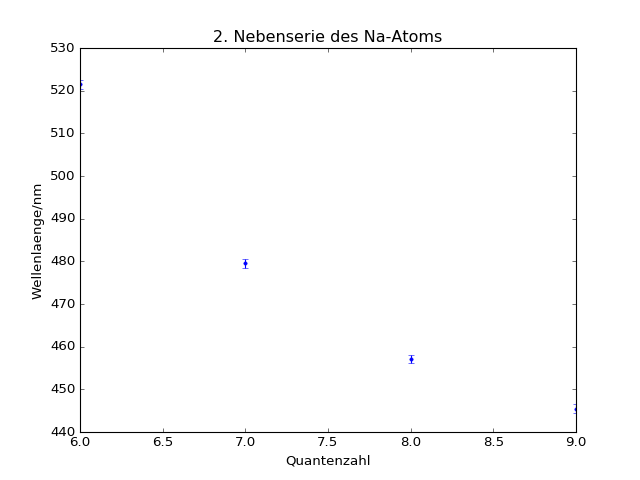

E_Ry= -13.0121186463 ,Standardfehler= 2.71357222039
E_3p= -3.01523141359 ,Standardfehler= 0.0283276690939
D_d= 1.48432671721 ,Standardfehler= 0.376019046809


In [18]:
wellenl=np.array([521.5,479.5,457.1,445.5])
fehler=np.array([1,1,1,1])
quantenz=np.arange(6,10)

plt.errorbar(quantenz,wellenl,fehler, fmt=".")
plt.xlabel('Quantenzahl')
plt.ylabel('Wellenlaenge/nm')
plt.title('2. Nebenserie des Na-Atoms')

from scipy.optimize import curve_fit
def fit_func(m,E_Ry,E_3p,D_d):
    return 1.2398E3/(E_Ry/(m-D_d)**2-E_3p)

para = [-13.6,-3,-0.02]
popt, pcov = curve_fit(fit_func, quantenz, wellenl, sigma=fehler ,p0=para)

print("E_Ry=",popt[0], ",Standardfehler=", np.sqrt(pcov[0][0]))
print("E_3p=",popt[1], ",Standardfehler=", np.sqrt(pcov[1][1]))
print("D_d=",popt[2], ",Standardfehler=", np.sqrt(pcov[2][2]))


<IPython.core.display.Javascript object>


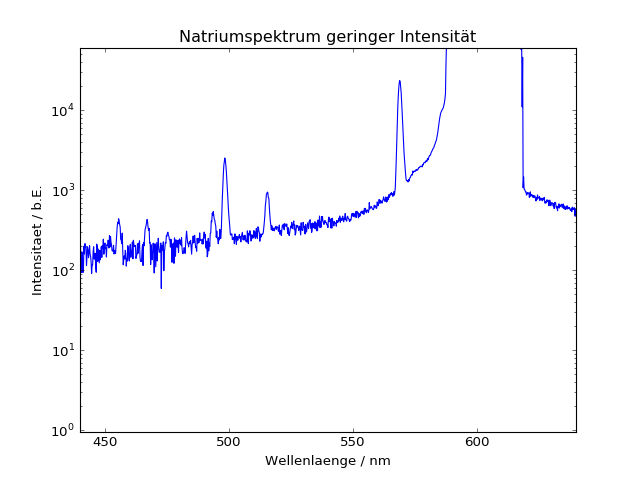

In [19]:
lamb, inten=np.loadtxt('data/Nasa.txt',skiprows=17, 
        converters= {0:comma_to_float, 1:comma_to_float},
        comments='>', unpack=True)


plt.plot(lamb, inten)
plt.title('Natriumspektrum geringer Intensität')
plt.xlabel('Wellenlaenge / nm')
plt.ylabel('Intensitaet / b.E.')
plt.yscale('log')
plt.xlim((440,640))
plt.ylim((0,60000))
plt.savefig("data/nasa.pdf", format="pdf")